Simple linear regression is limited to only one feature and one label (predicted value)

In [1]:
# this will be done through numpy which used ols
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
df = pd.read_csv('notebook/08-Linear-Regression-Models/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
# find out the total spendings for the company by adding up each department
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
df['total_spend']

0      337.1
1      128.9
2      132.4
3      251.3
4      250.0
       ...  
195     55.7
196    107.2
197    192.7
198    391.8
199    249.4
Name: total_spend, Length: 200, dtype: float64

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

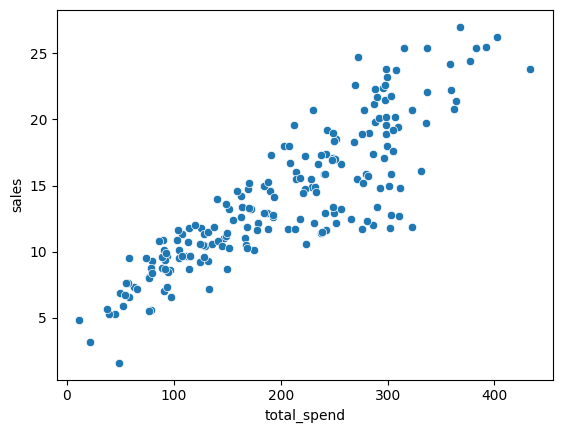

In [4]:
sns.scatterplot(data=df, x = 'total_spend', y = 'sales')

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

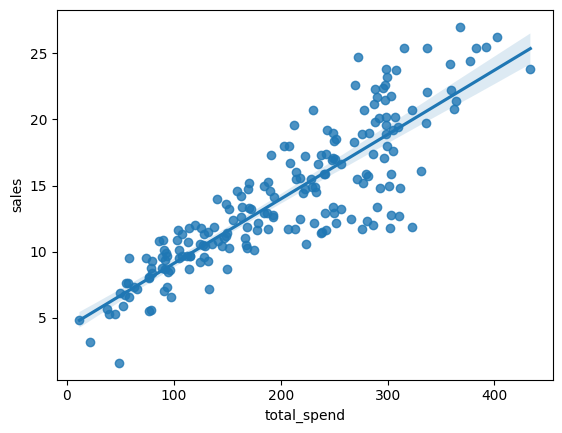

In [5]:
# this looks like a linear regression
sns.regplot(data= df , x = 'total_spend', y = 'sales') # regplot will add a regression line

In [7]:
# now lets predict teh total spending 
X = df['total_spend']
y = df['sales']
# numpy.polyfit will perform a least squares polynomial fit, you can fit x ,x^2 , x^3 denoted by the degree attribute, in this case we want x in power of 1
# y = mx + b 
# y = B1x + B)

np.polyfit(X, y, deg=1) # we get back the beta coeficient
# B1 and B0

array([0.04868788, 4.24302822])

In [8]:
# now lets predict 
potential_spend = np.linspace(0,500,100)

In [9]:
predicted_sales = 0.04868788* potential_spend + 4.24302822
predicted_sales # these are the predicted values

array([ 4.24302822,  4.4889266 ,  4.73482499,  4.98072337,  5.22662176,
        5.47252014,  5.71841852,  5.96431691,  6.21021529,  6.45611367,
        6.70201206,  6.94791044,  7.19380883,  7.43970721,  7.68560559,
        7.93150398,  8.17740236,  8.42330075,  8.66919913,  8.91509751,
        9.1609959 ,  9.40689428,  9.65279266,  9.89869105, 10.14458943,
       10.39048782, 10.6363862 , 10.88228458, 11.12818297, 11.37408135,
       11.61997974, 11.86587812, 12.1117765 , 12.35767489, 12.60357327,
       12.84947165, 13.09537004, 13.34126842, 13.58716681, 13.83306519,
       14.07896357, 14.32486196, 14.57076034, 14.81665873, 15.06255711,
       15.30845549, 15.55435388, 15.80025226, 16.04615064, 16.29204903,
       16.53794741, 16.7838458 , 17.02974418, 17.27564256, 17.52154095,
       17.76743933, 18.01333771, 18.2592361 , 18.50513448, 18.75103287,
       18.99693125, 19.24282963, 19.48872802, 19.7346264 , 19.98052479,
       20.22642317, 20.47232155, 20.71821994, 20.96411832, 21.21

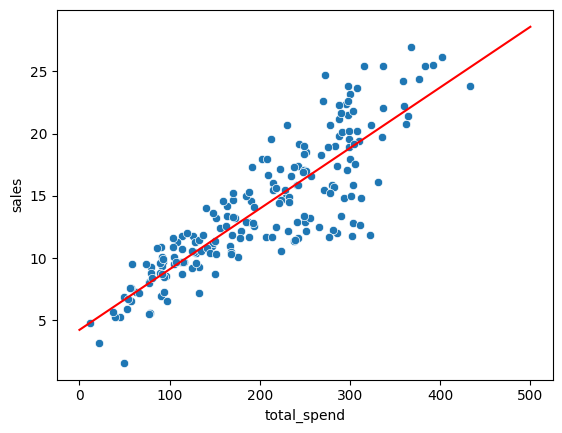

In [12]:
sns.scatterplot(data= df, x = 'total_spend', y='sales')
plt.plot(potential_spend, predicted_sales, color='red') # this way we fit the regression line into the graph

In [14]:
# testing for a potentional expenditure
spend = 200 
predicted_sale = 0.04868788* 200 + 4.24302822
predicted_sale # we will have almost 14 sales

13.98060422

In [15]:
# np.polyfit(X,y,3) 3 denotes the highest degree for this fitting
np.polyfit(X,y, 3)
# b3, b2, b1, b0


array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [16]:
pot_spend = np.linspace(0,500,100)
pot_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [20]:
pred_sales = 3.07615033e-07 * pot_spend ** 3 -1.89392449e-04 * pot_spend ** 2 + 8.20886302e-02* pot_spend ** 1 + 2.70495053e+00
pred_sales

array([ 2.70495053,  3.11474825,  3.51512186,  3.90630911,  4.28854779,
        4.66207567,  5.02713053,  5.38395013,  5.73277224,  6.07383466,
        6.40737513,  6.73363145,  7.05284138,  7.3652427 ,  7.67107318,
        7.97057059,  8.2639727 ,  8.5515173 ,  8.83344215,  9.10998503,
        9.38138371,  9.64787596,  9.90969955, 10.16709227, 10.42029188,
       10.66953616, 10.91506288, 11.15710981, 11.39591473, 11.63171541,
       11.86474963, 12.09525515, 12.32346975, 12.54963121, 12.77397729,
       12.99674578, 13.21817443, 13.43850104, 13.65796337, 13.87679919,
       14.09524628, 14.31354241, 14.53192536, 14.75063289, 14.96990278,
       15.18997281, 15.41108075, 15.63346437, 15.85736144, 16.08300974,
       16.31064705, 16.54051112, 16.77283975, 17.0078707 , 17.24584174,
       17.48699065, 17.73155521, 17.97977318, 18.23188233, 18.48812045,
       18.74872531, 19.01393467, 19.28398632, 19.55911802, 19.83956755,
       20.12557268, 20.41737119, 20.71520085, 21.01929943, 21.32

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

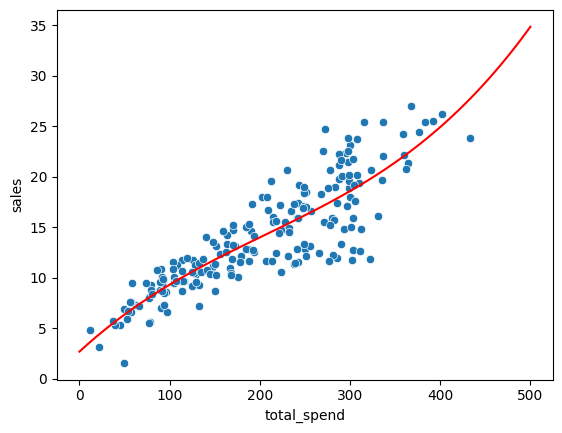

In [24]:
plt.plot(pot_spend, pred_sales, color='red')
sns.scatterplot(data=df, x = 'total_spend', y='sales')